### Week 13 HW:  
Neural Network on Cat vs Dog Kaggle Dataset

### 1. Download the Kaggle Cat-vs-Dog Dataset  
https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
# Downloading Kaggle Dogs vs Cats Dataset
!kaggle competitions download -c dogs-vs-cats

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

In [1]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-474.99448, shape=(), dtype=float32)


In [2]:
# importing required libraries

import numpy as np 
import pandas as pd 
import random

import matplotlib.pyplot as plt

import os
import zipfile

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [3]:
# checking for the path
base_dir = 'dogs-vs-cats/train/train/'
img_names = os.listdir(os.path.join(base_dir))
img_names[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

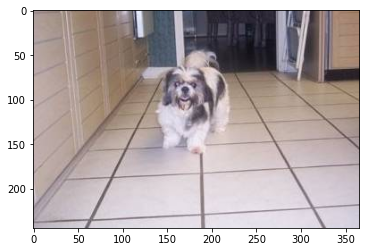

In [8]:
# checking for the path with image
sample = random.choice(img_names)
image = load_img("dogs-vs-cats/train/train/" + sample)
plt.imshow(image)
plt.show()

In [9]:
# Preparing Data in DF
# Assigning the label Dog and Cat for the images

label = []

for i in img_names:
    if(i.split(".")[0] == "dog"):
        label.append("Dog")
    else:
        label.append("Cat")

label[:10]

['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat']

In [11]:
df = pd.DataFrame({"Image" : img_names, "Label" : label})
df.tail()

,Image,Label
24995,dog.9995.jpg,Dog
24996,dog.9996.jpg,Dog
24997,dog.9997.jpg,Dog
24998,dog.9998.jpg,Dog
24999,dog.9999.jpg,Dog


In [12]:
# Printing out shape
df.shape

(25000, 2)

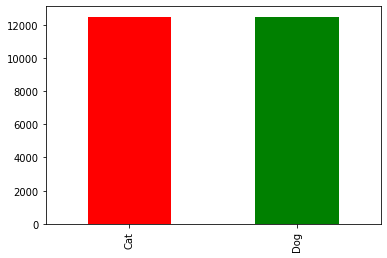

In [13]:
# checking for equal number of dog and cat images
df.Label.value_counts().plot.bar(color = ['red','green'])
plt.show()

In [14]:
# Splitting the training dataset
train_df, validate_df = train_test_split(df, test_size = 0.2)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

### 2. Use Preprocessing to turn the data into something the NN can work with.  Use either the ImageDataGenerator() or the keras.preprocessing.load_img() function builts into Keras.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

OR

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array
  
  
You want to scale the images such that they are a consistent size.  200x200 or 250x250 would be good choices.

To make the image a useful input for a NN, we want it to be a numpy array.

In [15]:
# training generator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "dogs-vs-cats/train/train/", 
    x_col='Image',
    y_col='Label',
    target_size = (250, 250),
    class_mode = 'binary',
    batch_size = 20
)

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
# validation generator
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "dogs-vs-cats/train/train", 
    x_col='Image',
    y_col='Label',
    target_size = (250, 250),
    class_mode = 'binary',
    batch_size = 20
)

Found 5000 validated image filenames belonging to 2 classes.


In [17]:
# testing generator

test_dir = 'dogs-vs-cats/test1/test1'
test_img = os.listdir(os.path.join(test_dir))
test_img[:10]

test_df = pd.DataFrame({'Image': test_img})
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "dogs-vs-cats/test1/test1", 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (250, 250),
    batch_size = 20,
    shuffle = False
)

Found 12500 validated image filenames.


### 3. Use the Tensorflow and Keras libraries from last week to build a NN.

*Use last week's class notes as an example.  Try using different activation functions  

Remember: start with a simple model and iterate.


In [18]:
# Building the model with CNN architecture which is highly accurate for images

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       1

In [20]:
# Compling the model
model.compile(loss = 'binary_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])

In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(20000/20),  # 20000 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(5000/20),  # 5000 images = batch_size * steps
      verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 1192s 1s/step - loss: 0.6847 - accuracy: 0.5491 - val_loss: 0.6663 - val_accuracy: 0.6046
Epoch 2/10
1000/1000 [==============================] - 553s 553ms/step - loss: 0.6663 - accuracy: 0.5926 - val_loss: 0.6478 - val_accuracy: 0.6030
Epoch 3/10
1000/1000 [==============================] - 552s 552ms/step - loss: 0.6509 - accuracy: 0.6047 - val_loss: 0.6457 - val_accuracy: 0.6030
Epoch 4/10
1000/1000 [==============================] - 31822s 32s/step - loss: 0.6313 - accuracy: 0.6348 - val_loss: 0.5957 - val_accuracy: 0.6830
Epoch 5/10
1000/1000 [==============================] - 1280s 1s/step - loss: 0.6100 - accuracy: 0.6599 - val_loss: 0.5731 - val_accuracy: 0.7000
Epoch 6/10
1000/1000 [==============================] - 800s 800ms/step - loss: 0.5928 - accuracy: 0.6793 - val_loss: 0.5466 - val_accuracy: 0.7318
Epoch 7/10
1000/1000 [==============================] - 772s 772ms/step - loss: 0.5770 - accuracy: 0.6937 - val_loss

In [34]:
model.save('dogs_cats2')

INFO:tensorflow:Assets written to: dogs_cats2\assets


In [ ]:
# model = tf.keras.models.load_model('a')
# history = tf.keras.models.load_model('a')

#### 4. Chart your training/validation loss as well as your training/validation accuracy

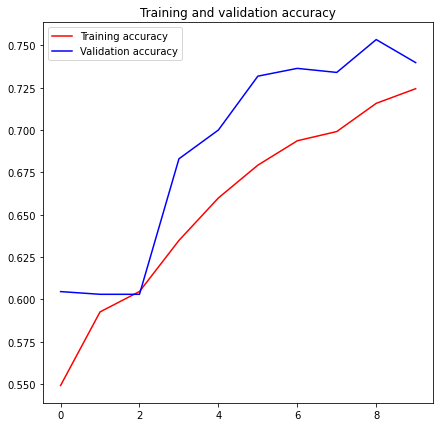

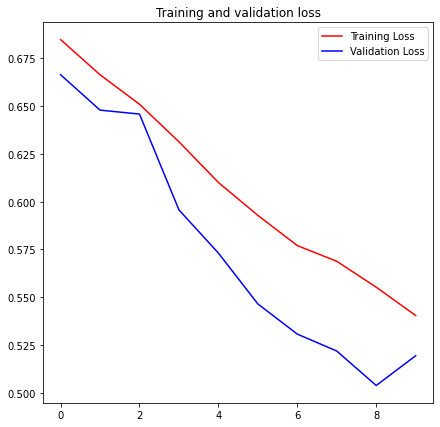

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing with Test Data

In [36]:
test_dir = 'dogs-vs-cats/test1/test1'
test_img = os.listdir(os.path.join(test_dir))
test_img[:10]

test_df = pd.DataFrame({'Image': test_img})

In [37]:
predict = model.predict(test_generator, steps = np.ceil(12500/20))

In [38]:
predict

array([[0.68869734],
       [0.29600966],
       [0.27875364],
       ...,
       [0.85175467],
       [0.26282203],
       [0.7847861 ]], dtype=float32)

In [39]:
def label(predict):
    if(predict > 0.5):
        return "Dog"
    else:
        return "Cat"

In [40]:
test_df['Label'] = predict
test_df['Label'] = test_df['Label'].apply(label)
# test_df['category'] = test_df['Label']

In [42]:
test_df.tail()

,Image,Label
12495,9995.jpg,Cat
12496,9996.jpg,Dog
12497,9997.jpg,Dog
12498,9998.jpg,Cat
12499,9999.jpg,Dog


In [43]:
test_df.Label.value_counts()

Dog    7500
Cat    5000
Name: Label, dtype: int64

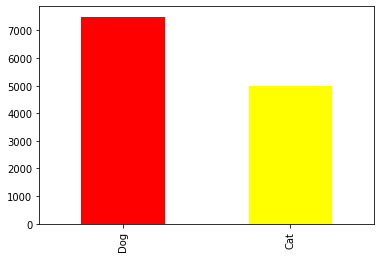

In [44]:
test_df.Label.value_counts().plot.bar(color = ['red','yellow'])
plt.show()

In [45]:
v = random.randint(0, 12000)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop = True)
sample_test.head()


,Image,Label
0,4631.jpg,Dog
1,4632.jpg,Cat
2,4633.jpg,Cat
3,4634.jpg,Dog
4,4635.jpg,Dog


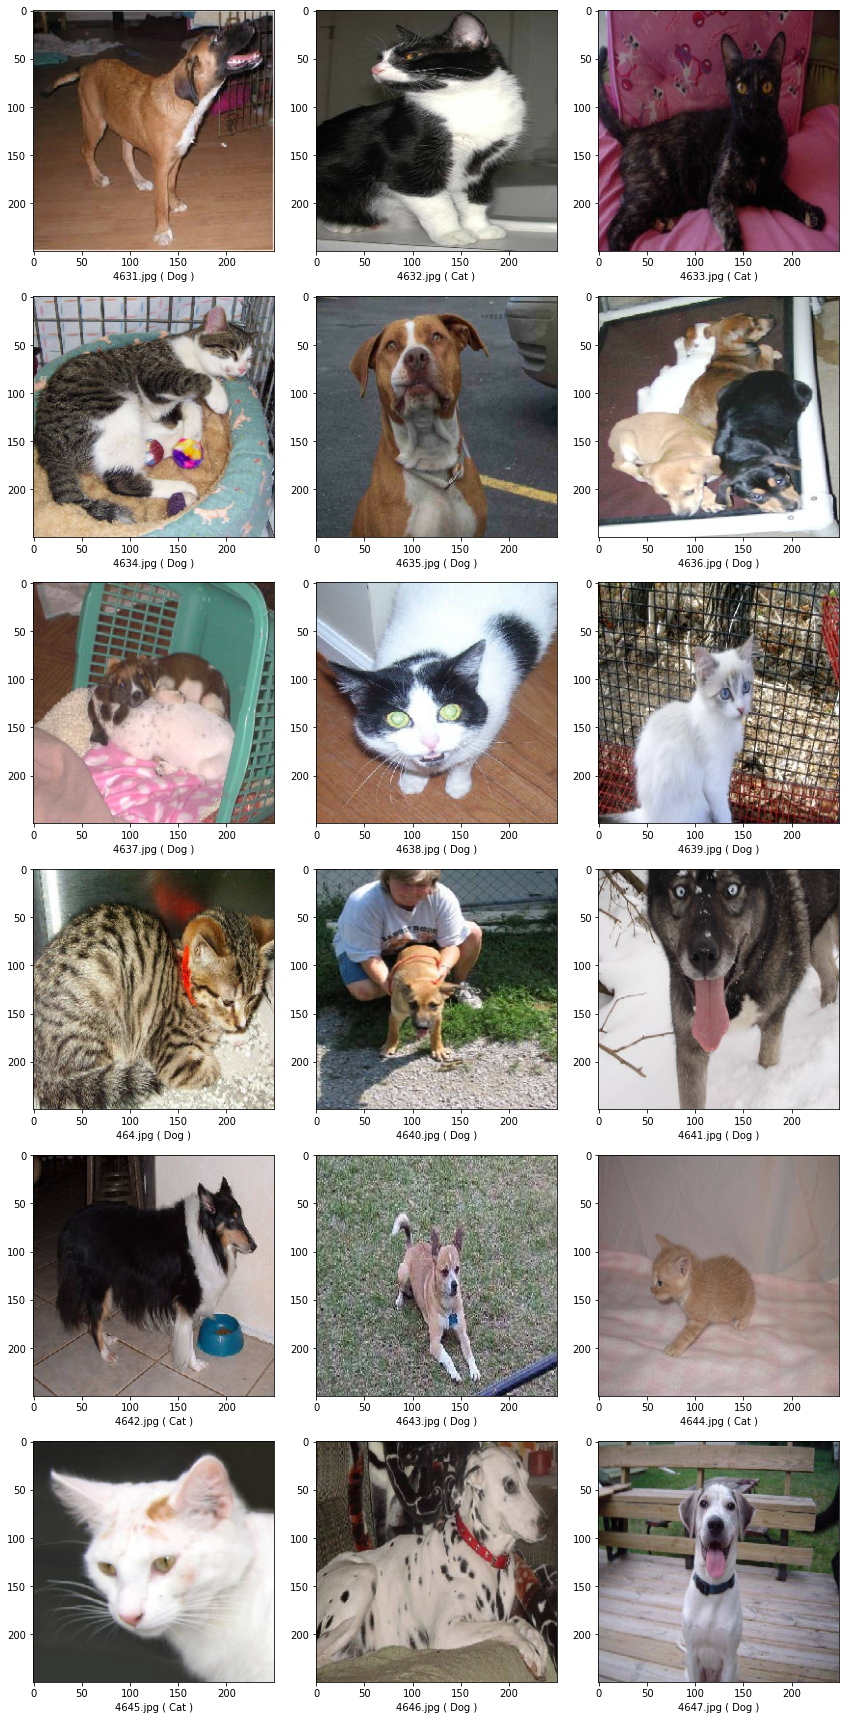

In [52]:
import PIL

filename = "dogs-vs-cats/test1/test1/"
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    prediction = row['Label']
    img = load_img(filename + row['Image'], target_size = (250, 250))
#     print(img)
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(row['Image'] + ' ( ' + "{}".format(prediction) + ' )' )
plt.tight_layout()
plt.show()